# Analisis perusahaan Y.Afisha

Pada kegiatan ini, perusahaan Y.Afisha ingin mengoptimalkan anggaran biaya pemasaran dengan melakukan analisis dari data - data yang dimiliki.

## Pra-pemrosesan

### Pemanggilan library

Pertama dilakukan pemanggilan <i>library</i> yang akan dilakukan dalam kegiatan analisis ini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Pemanggilan <i>dataset</i>

Selanjutnya dilakukan pemanggilan <i>dataset</i> yang diperlukan dalam pengerjaan kegiatan analisis ini

In [3]:
try:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')

except:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    costs = pd.read_csv('/datasets/costs_us.csv')

### Pengeksplorasian data awal

Pada kegiatan analisis ini, terdapat 3 <i>dataset</i> yang digunakan. Pada <i>dataset</i> `visits` memiliki kolom sebagai berikut:
-   Uid — ID pengguna
-   Device —perangkat pengguna
-   Start Ts — tanggal dan waktu dimulainya sesi
-   End Ts — tanggal dan waktu berakhirnya sesi
-   Source Id — ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web

Pada <i>dataset</i> `orders` memiliki kolom sebagai berikut:
-    Uid — ID pengguna yang membuat pesanan
-    Buy Ts — tanggal dan waktu pesanan dibuat
-    Revenue — pendapatan Y.Afisha dari pesanan tersebut

Dan pada <i>dataset</i> `costs` memiliki kolom sebagai berikut:
-    source_id — ID sumber iklan
-    dt — tanggal
-    costs — pengeluaran untuk sumber iklan pada tanggal tersebut 

#### Pengeksplorasian dataset `visits`

In [4]:
visits.shape

(359400, 5)

In [5]:
visits.info(memory_usage='deep')
visits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [6]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
visits.duplicated().sum()

0

Dataset `visits` memiliki data dengan ukuran 79 Megabita dengan jumlah baris 359.400. Perlu dilakukan pengoptimalan pada dataset ini sehingga ukuran dataset ini bisa semakin lebih kecil dan proses analisis akan semakin lebih cepat. Kolom yang mengandung tipe data objek bisa diubah menjadi tipe data yang lain agar ukuran data semakin kecil. Kolom tersebut adalah `Device`, `End Ts`, dan `Start Ts`. Selain itu urutan kolom dan penulisan judul kolom `visits` bisa diubah agar lebih mudah dibaca. Tidak ada nilai duplikat pada dataset `visits`.

#### Pengeksplorasian dataset `orders`

In [8]:
orders.shape

(50415, 3)

In [9]:
orders.info(memory_usage='deep')
orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders.duplicated().sum()

0

Dataset `orders` memiliki ukuran 4,4 megabita dan jumlah kolom 50415. Tidak ada nilai yang hilang pada dataset `orders`. Kolom `Buy Ts` bisa diubah tipedata nya agar ukuran dataset semakin kecil. Terakhir urutan dan penamaan judul kolom bisa diubah agar lebih mudah dibaca dan penulisan yang konsisten. Tidak ada nilai duplikat pada dataset `orders`.

#### Pengeksplorasian dataset `costs`

In [12]:
costs.shape

(2542, 3)

In [13]:
costs.info(memory_usage='deep')
costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [14]:
costs['source_id'].value_counts()

5     364
2     363
4     363
10    363
1     363
3     363
9     363
Name: source_id, dtype: int64

In [15]:
costs.sample(5)

,source_id,dt,costs
539,2,2017-11-24,507.09
1213,4,2017-10-03,119.74
2353,10,2017-11-22,4.93
1392,4,2018-04-02,65.09
2128,9,2018-04-11,10.72


In [16]:
costs.duplicated().sum()

0

Pada dataset `costs` memuat total biaya yang dikeluarkan untuk iklan setiap bulannya. Terdapat 2542 baris dan 3 kolom. Kolom `dt` bisa diubah tipedatanya menjadi datetitme. Kolom `source_id` juga bisa diubah tipe datanya agar ukurannya semakin kecil. Dari `costs` juga dapat dilihat bahwa rata - rata dikeluarkan biaya sekitar 129 dollar untuk iklan, dengan pengeluaran terkecil adalah 0,54 dollar dan pengeluaran terbesar adalah 1788,28 dollar. Tidak ada nilai duplikat pada dataset `costs`.

### Kesimpulan sementara

Dari hasil pra pemrosesan data, diperoleh berbagai kesimpulan
- Terdapat 3 dataset, yakni `visits`, `orders`, dan `costs`, ketiga dataset ini tidak memiliki nilai yang hilang maupun nilai duplikat
- Pada dataset `visits`, perlu dilakukan perubahan tipedata untuk beberapa kolom, perubahan nama judul kolom, serta mengatur kembali urutan kolom sehingga semakin mudah untuk dilakukan analisa
- Pada dataset `orders`, kolom `Buy Ts` bisa diubah tipedata nya untuk menjadikan ukuran datanya semakin kecil dan semakin mudah dilakukan analisa, selain itu perlu diubah juga judul kolom dan urutan kolom
- Pada dataset `costs`, kolom `dt` perlu diubah tipedatanya menjadi datetime agar mudah dilakukan analisa.

## Pemrosesan data

Selanjutnya dilakukan pemrosesan data agar merubah tipe- tipe data yang dimiliki oleh masing - masing dataset

### Pemrosesan dataset `visits`

#### Perubahan tipe data

In [17]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

Dapat dilihat bahwa pada dataset `visits` hanya terdapat 2 jenis data, yakni desktop (PC) dan touch (perangkat layar sentuh). Kedua data ini bisa diubah menjadi tipe data kategori

In [18]:
visits['Device'] = visits['Device'].astype('category')
visits.dtypes

Device       category
End Ts         object
Source Id       int64
Start Ts       object
Uid            uint64
dtype: object

In [19]:
visits['Source Id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

Hanya terdapat angka 1 - 10 pada kolom Source Id, sehingga nilai ini bisa diubah menjadi unit8, yaitu interger dengan rentang dari 0 hingga 255

In [20]:
visits['Source Id'] = visits['Source Id'].astype('uint8')
visits.dtypes

Device       category
End Ts         object
Source Id       uint8
Start Ts       object
Uid            uint64
dtype: object

Terakhir, diubah tipe data untuk kolom End Ts dan Start Ts

In [21]:
visits['End Ts'] = visits['End Ts'].astype('datetime64[m]')
visits['Start Ts'] = visits['Start Ts'].astype('datetime64[m]')

In [22]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  uint8         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), uint64(1), uint8(1)
memory usage: 8.9 MB


Terdapat pengurangan memori dari 79 megabita menjadi 9 megabita. Data telah menjadi lebih ringkas

#### Perubahan judul dan urutan kolom

Pertama dirubah terlebih dahulu judul kolom

In [23]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  uint8         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), uint64(1), uint8(1)
memory usage: 8.9 MB


Selanjutnya dilakukan penataan dari urutan kolom dataset `visits`

In [24]:
new_visits = ['uid', 'device', 'start_ts', 'end_ts', 'source_id']
visits = visits[new_visits]
visits.head()

,uid,device,start_ts,end_ts,source_id
0,16879256277535980062,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,4
1,104060357244891740,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2
2,7459035603376831527,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,5
3,16174680259334210214,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,9
4,9969694820036681168,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,3


### Pemrosesan dataset `orders`

#### Perubahan tipe data

Hanya perlu diubah satu kolom pada dataset `orders`, yakni `Buy Ts`

In [25]:
orders['Buy Ts'] = orders['Buy Ts'].astype('datetime64[m]')
orders.dtypes

Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

In [26]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Terdapat penurunan jumlah memori yang digunakan, dari 4,4 megabita menjadi 1,2 megabita

#### Perubahan judul dan urutan kolom

Pertama dilakukan perubahan judul kolom

In [27]:
orders.columns=['buy_ts', 'revenue', 'uid']
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Lalu dilakukan perubahan urutan kolom

In [28]:
new_orders=['uid', 'buy_ts', 'revenue']
orders = orders[new_orders]
orders.head()

,uid,buy_ts,revenue
0,10329302124590727494,2017-06-01 00:10:00,17.00
1,11627257723692907447,2017-06-01 00:25:00,0.55
2,17903680561304213844,2017-06-01 00:27:00,0.37
3,16109239769442553005,2017-06-01 00:29:00,0.55
4,14200605875248379450,2017-06-01 07:58:00,0.37


### Pemrosesan dataset `costs`

Terdapat 2 kolom yang akan diubah tipe datanya, yakni `Source Id` dan `dt`

In [29]:
costs['source_id'] = costs['source_id'].astype('uint8')
costs['dt'] = costs['dt'].astype('datetime64[D]')
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   uint8         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), uint8(1)
memory usage: 42.3 KB


Telah dilakukan pengurangan memori, dari 206 kilobita mnejadi 42 kilobita

### Kesimpulan Sementara

Telah dilakukan pemrosesan data dari dataset `visits`, `orders`, dan `costs` dengan kesimpulan sebagai berikut:
- Pada dataset `visits`, kolom `source_id`, `end_ts`, `start_ts`, dan `device` diubah tipedatanya, sehingga terjadi pengurangan memori dari 79 megabita menjadi 9 megabita. Selain itu judul dan urutan kolom diubah agar data semakin mudah dilihat dan penulisan judul yang konsisten
- Pada dataset `orders`, kolom `buy_ts` telah diubah tipe datanya sehingga terjadi pengurangan memori dari 4,4 megabita menjadi 1,2 megabita. Selain itu judul dan urutan kolom diubah
- Pada dataset `costs`, kolom `source_id` dan `dt` diubah tipe datanya sehingga terjadi pengurangan memori dari 206 kilobita menjadi 42 kilobita

## Menyusun laporan dan menghitung metrik

Setelah dataset diproses agar semakin mudah untuk dilakukan penganalisaan, dilakukan penyusunan laporan dengan menghitung metrik - metrik yang diperlukan

### Evaluasi aktivitas pengguna

Pertama akan dilakukan evaluasi aktivitas pengguna per hari, minggu, dan bulan. Akan diubah data menjadi berdasarkan bulan, minggu, dan hari

In [30]:
visits['session_month'] = visits['start_ts'].astype('datetime64[M]') #penggunaan astype digunakan karena terdapat 2 tahun data
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_day'] = visits['start_ts'].astype('datetime64[D]')
visits.head()

,uid,device,start_ts,end_ts,source_id,session_month,session_week,session_day
0,16879256277535980062,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,4,2017-12-01,2017-12-14,2017-12-20
1,104060357244891740,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2,2018-02-01,2018-02-15,2018-02-19
2,7459035603376831527,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,5,2017-07-01,2017-06-29,2017-07-01
3,16174680259334210214,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,9,2018-05-01,2018-05-17,2018-05-20
4,9969694820036681168,desktop,2017-12-27 14:06:00,2017-12-27 14:06:00,3,2017-12-01,2017-12-21,2017-12-27


Lalu dilakukan pengelompokan jumlah pengguna unik yang mendatangi situs berdasarkan bulan, minggu, dan hari

In [31]:
monthly_users = visits.groupby('session_month').agg({'uid':'nunique'})
weekly_users = visits.groupby('session_week').agg({'uid':'nunique'})
daily_users = visits.groupby('session_day').agg({'uid':'nunique'})

In [32]:
#hasil dari pengelompokan per bulan
monthly_users

,uid
session_month,
2017-06-01,13259
2017-07-01,14183
2017-08-01,11631
2017-09-01,18975
2017-10-01,29692
2017-11-01,32797
2017-12-01,31557
2018-01-01,28716
2018-02-01,28749


Lalu dilakukan penggambaran kurva untuk melihat jumlah pengguna unik yang datang ke situs

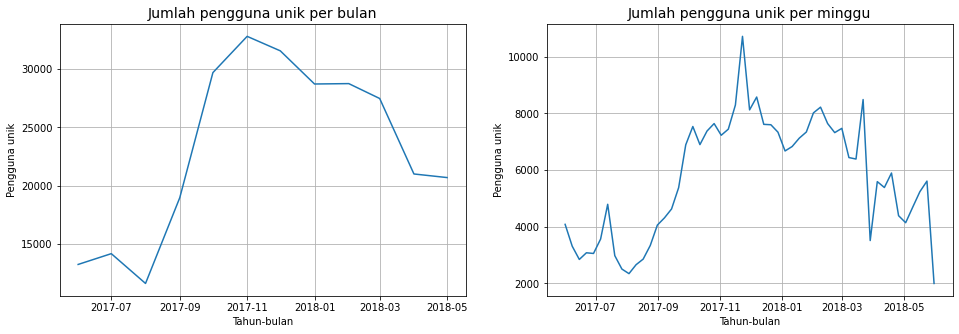

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes = axes.reshape(-1)
axes[0].plot(monthly_users)
axes[0].set_title('Jumlah pengguna unik per bulan', fontsize=14)
axes[0].set_xlabel('Tahun-bulan')
axes[0].set_ylabel('Pengguna unik')
axes[0].grid(True)

axes[1].plot(weekly_users)
axes[1].set_title('Jumlah pengguna unik per minggu', fontsize=14)
axes[1].set_xlabel('Tahun-bulan')
axes[1].set_ylabel('Pengguna unik')
axes[1].grid(True)

<AxesSubplot:title={'center':'Jumlah pengguna unik per hari'}, xlabel='Tahun-bulan', ylabel='Pengguna unik'>

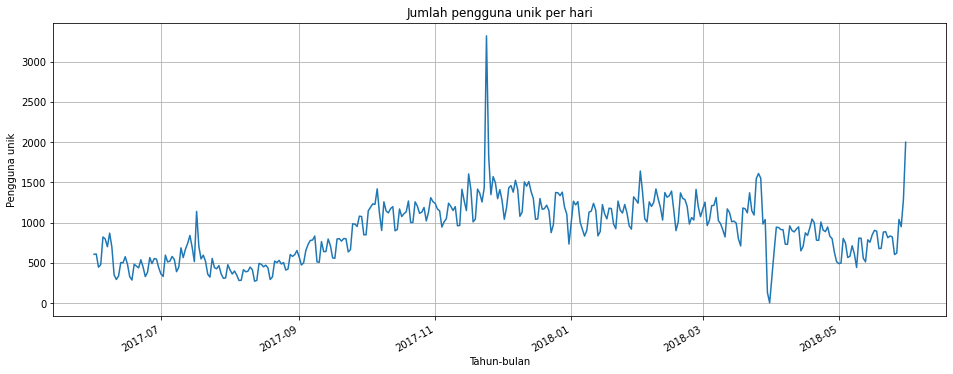

In [34]:
daily_users.plot(title='Jumlah pengguna unik per hari',
                 xlabel='Tahun-bulan',
                 ylabel='Pengguna unik',
                 grid=True,
                 legend=False,
                 figsize=(16, 6))

In [35]:
print('Rata - rata pengguna unik per bulan:', int(monthly_users.uid.mean()))
print('Rata - rata pengguna unik per minggu:', int(weekly_users.uid.mean()))
print('Rata - rata pengguna unik per hari:', int(daily_users.uid.mean()))

Rata - rata pengguna unik per bulan: 23228
Rata - rata pengguna unik per minggu: 5724
Rata - rata pengguna unik per hari: 907


Setiap hari terdapat 907 pengguna unik yang mengunjungi situs. Setiap minggu terdapat 5724 pengguna unik yang mengunjungi situs. Dan setiap bulan terdapat 23228 pengguna unik yang mengunjungi situs. Dapat terlihat bahwa dari bulan 8 tahun 2017  hingga bulan 12 tahun 2017 terdapat kenaikan pengguna unik yang mengunjungi situs, dilanjut dari bulan 12 tahun 2017 hingga bulan 5 tahun 2018 terdapat penurunan pengguna unik yang mengunjungi situs. Dari perbandingan rata - rata pengguna unik per hari dan per minggu, dapat terlihat bahwa terdapat pengguna yang mengunjungi situsi lebih dari 1 kali per minggu.

### Lama durasi

In [36]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration'].describe()

count    359400.000000
mean        643.460601
std        1016.363410
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

Dapat terlihat bahwa rata - rata penggunjung mengunjungi situs sekitar 643 detik atau 10 menit. Namun terdapat pengguna yang menggunjungi situs secara tidak wajar, dapat terlihat dari jumlah maksimum hampir 84.480 detik atau hampir 23 jam. Untuk dapat melakukan analisa data dengan baik, kita perlu menghilangkan data - data bersifat outlier. Diasumsikan mengambil data dengan jumlah pengguna dibawah 3600 detik atau 1 jam.

Text(0.5, 0, 'Durasi (detik)')

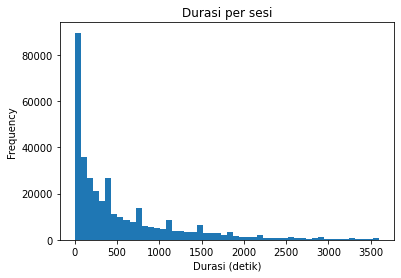

In [37]:
filtered_duration = visits[visits['session_duration'] <= 3600]
ax = filtered_duration['session_duration'].plot(kind='hist', bins=50, title='Durasi per sesi')
ax.set_xlabel('Durasi (detik)')

In [38]:
print('Rata - rata durasi per sesi:', int(filtered_duration['session_duration'].mean()))

Rata - rata durasi per sesi: 555


Rata - rata pengunjung mengunjungi situs dengan durasi 555 detik atau sekitar 9 menit. Dari kurva histogram dapat terlihat bahwa banyak pengunjung yang mengunjungi situs kurang dari 250 detik, atau kurang dari 2 menit.

### Distribusi pengguna kembali menggunakan produk

Selanjutnya akan dilihat seberapa sering pengguna kembali menggunakan produk. Pertama akan dilakukan pengambilan pengguna yang mengunjungi situs lebih dari satu kali.

In [39]:
first_visits = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visits.columns = ['uid', 'first_visit']
first_visits.head()

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Selanjutnya dilakukan penggabungan untuk mengetahui pengguna yang mengunjungi situs lebih dari satu kali

In [40]:
visits = visits.merge(first_visits, on='uid')
visits['mins_since_first_visit'] = ((visits['start_ts'] - visits['first_visit']).dt.seconds / 60).astype('int')
visits.head()

,uid,device,start_ts,end_ts,source_id,session_month,session_week,session_day,session_duration,first_visit,mins_since_first_visit
0,16879256277535980062,touch,2017-12-20 17:20:00,2017-12-20 17:38:00,4,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,0
1,104060357244891740,desktop,2018-02-19 16:53:00,2018-02-19 17:21:00,2,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,0
2,7459035603376831527,touch,2017-07-01 01:54:00,2017-07-01 01:54:00,5,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,0
3,16174680259334210214,desktop,2018-05-20 10:59:00,2018-05-20 11:23:00,9,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,894
4,16174680259334210214,desktop,2018-03-09 20:05:00,2018-03-09 20:33:00,4,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,0


Selanjutnya akan dilakukan filter untuk mencari kunjungan pengunjung yang mengunjungi lebih dari satu kali dan dari hasil ini akan dilakukan penggambaran kurva histogram nya.

Text(0.5, 0, 'durasi (menit)')

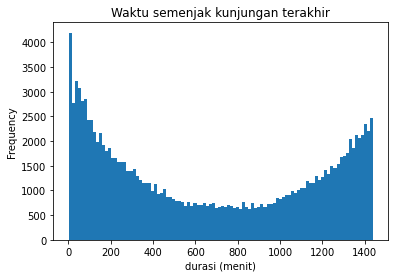

In [41]:
filtered_mins = visits.query('mins_since_first_visit > 0')
ax = filtered_mins['mins_since_first_visit'].plot(kind='hist',
                                             bins=100,
                                             title='Waktu semenjak kunjungan terakhir')

ax.set_xlabel('durasi (menit)')

In [42]:
print('Rata - rata waktu sejak kunjungan terakhir: {:.0f} jam'.format(filtered_mins['mins_since_first_visit'].mean() / 60))

Rata - rata waktu sejak kunjungan terakhir: 11 jam


Dari kurva histogram dapat diambil kesimpulan lebih banyak pengguna yang mengunjungi situs lebih dari satu kali dengan rentang kurang dari 200 menit atau 1200 hingga 1400 menit. Artinya pengguna bisa jadi mengunjungi kembali situs secara cepat dikarenakan pengguna ingin menyelesaikan urusan sebelum lupa atau pengguna baru mengunjungi kembali hampir satu hari setelah mengunjungi situs. Sehingga didapatkan rata - rata waktu sejak kunjungan terakhir 11 jam.

### Kapan orang - orang mulai melakukan pembelian

Selanjutnya akan dilihat kapan orang - orang mulai melakukan pembelian. Dalam dataset `orders` dapat terlihat orang - orang membeli pada jam tertentu, namun data yang masih bisa digali adalah perbandingan antara kapan orang mengunjungi dan membeli produk. Walau dapat terlihat banyak pengunjung yang mengunjungi situs, harus dilihat pula kapan pengunjung menjadi pembeli. Pertama akan dilakukan pengelompokan pengguna dan mengetahui kapan pengguna tersebut melakukan pembelian pertama

In [43]:
first_orders = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_orders.columns=['uid', 'first_order']
first_orders.head()

,uid,first_order
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


Selanjutnya akan digabungkan pengguna yang melakukan pembelian pertama kali ke dataset `orders`

In [44]:
orders = orders.merge(first_orders, on='uid')
orders.head()

,uid,buy_ts,revenue,first_order
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:10:00
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:25:00
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:27:00
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:29:00
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:58:00


Lalu akan diambil catatan pengguna unik yang mengunjungi situs pertama kali dan catatan pembeli unik yang membeli pertama kali

In [45]:
first_visits_only = visits[['uid', 'first_visit']].drop_duplicates()
first_orders_only = orders[['uid', 'first_order']].drop_duplicates()

In [46]:
#menyatukan kedua dataset diatas sehingga didapatkan pengunjung yang telah membeli dan kapan mereka melakukan kunjungan dan pembelian
visits_orders = first_visits_only.merge(first_orders_only, on='uid')
visits_orders.head()

,uid,first_visit,first_order
0,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:25:00
1,16007536194108375387,2017-09-03 21:35:00,2017-09-04 12:46:00
2,8056418121947262981,2017-06-04 14:17:00,2017-06-25 08:54:00
3,18188358787673499603,2018-02-10 12:17:00,2018-02-12 19:48:00
4,2307401184189569202,2017-09-23 23:27:00,2017-09-27 09:23:00


Setelah didapatkan pengunjung yang telah membeli, selanjutnya kita akan membagi data menjadi cohort - cohort. Cohort ini akan dibagi menjadi per bulan. Pertama akan dirubah `first_visit` dan `first_order` menjadi data bulanan

In [47]:
visits_orders['first_visit_month'] = visits_orders['first_visit'].astype('datetime64[M]')
visits_orders['first_order_month'] = visits_orders['first_order'].astype('datetime64[M]') 

In [48]:
visits_orders['first_visit_month'].value_counts()

2017-10-01    4678
2017-11-01    4262
2017-12-01    4074
2018-02-01    3186
2018-01-01    3119
2017-09-01    3058
2017-06-01    2923
2018-03-01    2838
2017-07-01    2458
2018-05-01    2316
2018-04-01    1890
2017-08-01    1721
Name: first_visit_month, dtype: int64

In [49]:
visits_orders['first_order_month'].value_counts()

2017-12-01    4383
2017-10-01    4340
2017-11-01    4081
2018-02-01    3651
2018-03-01    3533
2018-01-01    3373
2018-05-01    2988
2017-09-01    2581
2018-04-01    2276
2017-06-01    2023
2017-07-01    1923
2017-08-01    1370
2018-06-01       1
Name: first_order_month, dtype: int64

Setelah diubah data `first_visit` dan `first_order`, terdapat 1 data dimana pengguna melakukan belanja pertama kali pada bulan 6 tahun 2018. Karena hanya ada 1 data saja, maka data ini bisa dihapus terlebih dahulu

In [50]:
visits_orders = visits_orders[visits_orders['first_order_month'] != '2018-06-01']

Dalam analisis KPI, misalnya apabila satu pelanggan melakukan pendaftaran dan pembelian pertama pada hari yang sama, maka pengguna tersebut bisa dimasukkan ke dalam kategori Konversi h0. Jika pembelian pertama terjadi pada hari berikutnya, kategorinya pun akan menjadi Konversi h1. Dari hasil data yang telah diolah, bisa dicari rentang bulan antara kunjungan pertama dengan pembelian pertama

In [51]:
visits_orders['conversion'] = ((visits_orders['first_order_month'] - visits_orders['first_visit_month']) 
                               / np.timedelta64(1, 'M')
                              ).round().astype('int')
visits_orders.head(10)

,uid,first_visit,first_order,first_visit_month,first_order_month,conversion
0,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:25:00,2018-03-01,2018-03-01,0
1,16007536194108375387,2017-09-03 21:35:00,2017-09-04 12:46:00,2017-09-01,2017-09-01,0
2,8056418121947262981,2017-06-04 14:17:00,2017-06-25 08:54:00,2017-06-01,2017-06-01,0
3,18188358787673499603,2018-02-10 12:17:00,2018-02-12 19:48:00,2018-02-01,2018-02-01,0
4,2307401184189569202,2017-09-23 23:27:00,2017-09-27 09:23:00,2017-09-01,2017-09-01,0
5,4499746016005494365,2017-10-23 12:49:00,2017-11-16 14:04:00,2017-10-01,2017-11-01,1
6,15857957287537270437,2017-09-22 21:16:00,2018-03-12 23:17:00,2017-09-01,2018-03-01,6
7,15763368622958393183,2017-11-06 09:52:00,2018-03-06 18:33:00,2017-11-01,2018-03-01,4
8,15868686231870595097,2018-03-27 16:18:00,2018-03-27 19:45:00,2018-03-01,2018-03-01,0
9,9419370217043167984,2017-09-14 10:31:00,2017-10-03 11:02:00,2017-09-01,2017-10-01,1


Dari sini kita mendapatkan konversi untuk masing - masing pengguna. Selanjutnya nilai ini akan dimasukan ke dataset `orders` untuk mengetahui masing - masing transaksi memiliki nilai konversi berapa

In [52]:
orders = orders.merge(visits_orders[['uid', 'first_order_month','conversion']], on='uid')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,uid,buy_ts,revenue,first_order,first_order_month,conversion,order_month
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:10:00,2017-06-01,0,2017-06-01
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:25:00,2017-06-01,0,2017-06-01
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:27:00,2017-06-01,0,2017-06-01
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:29:00,2017-06-01,0,2017-06-01
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:58:00,2017-06-01,0,2017-06-01


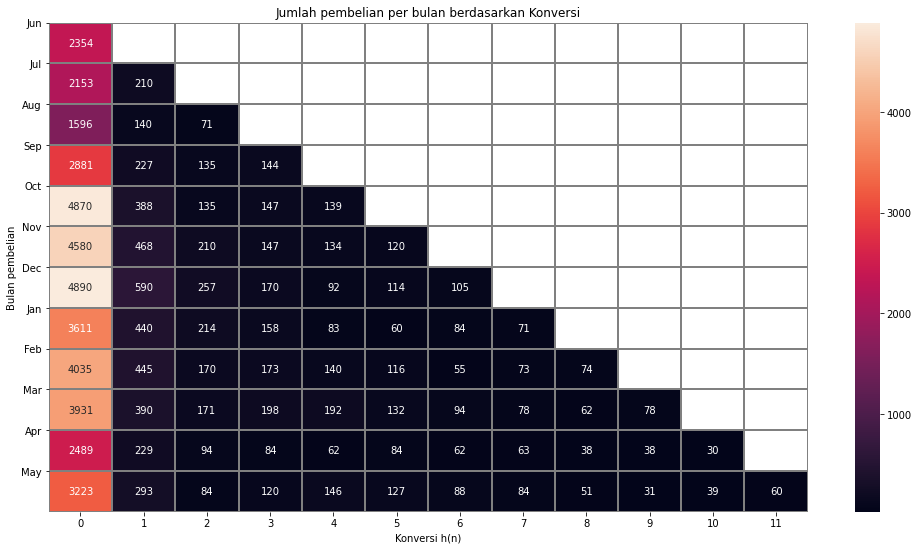

In [53]:
group_pivot = orders.pivot_table(index='order_month',
                                 columns='conversion',
                                 values='uid',
                                 aggfunc='count')

ticks = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

plt.figure(figsize=(17, 9))
plt.title('Jumlah pembelian per bulan berdasarkan Konversi')

ax = sns.heatmap(group_pivot,
                 annot=True,
                 fmt='.0f',
                 linewidths=1,
                 linecolor='gray')

ax.set_xlabel('Konversi h(n)')
ax.set_ylabel('Bulan pembelian')    
plt.yticks(range(len(ticks)), ticks)
plt.show()

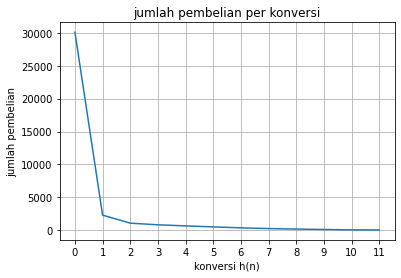

In [54]:
group_buys = visits_orders.groupby('conversion')['uid'].count().reset_index()
group_buys.columns = ['conversion', 'orders']

plt.plot(group_buys['conversion'], group_buys['orders'])
plt.title('jumlah pembelian per konversi')
plt.ylabel('jumlah pembelian')
plt.xlabel('konversi h(n)')
plt.xticks(range(0, 12))
plt.grid(True)
plt.show()

Dari heatmap dan kurva grafik, dapat terlihat bahwa mayoritas pelanggan membeli barang pada konversi h0, artinya adalah dalam bulan yang sama, pelanggan mengunjungi situs dan membeli barang. Pelanggan yang membeli barang 1 bulan setelah pengunjung mengunjungi situs (konversi h1) sangat sedikit dibandingkan dengan konversi h0.

### Jumlah pesanan yang dibuat per kohort

Selanjutnya akan dilihat jumlah pesanan yang dibuat per kohort per bulan nya.

In [55]:
orders['cohort_lifetime'] = (((orders['order_month'] - orders['first_order_month']) 
                   )/ np.timedelta64(1, 'M')
                   ).round().astype('int')
orders.head()

,uid,buy_ts,revenue,first_order,first_order_month,conversion,order_month,cohort_lifetime
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:10:00,2017-06-01,0,2017-06-01,0
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:25:00,2017-06-01,0,2017-06-01,0
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:27:00,2017-06-01,0,2017-06-01,0
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:29:00,2017-06-01,0,2017-06-01,0
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:58:00,2017-06-01,0,2017-06-01,0


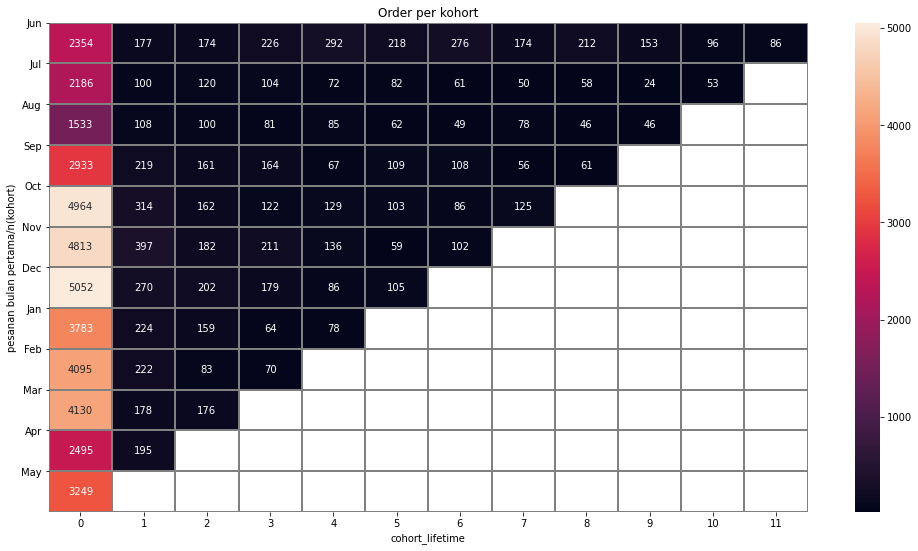

In [56]:
group_pivot = orders.pivot_table(index='first_order_month',
                                 columns='cohort_lifetime',
                                 values='uid',
                                 aggfunc='count')

ticks = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

plt.figure(figsize=(17, 9))
plt.title('Order per kohort')

ax = sns.heatmap(group_pivot,
                 annot=True,
                 fmt='.0f',
                 linewidths=1,
                 linecolor='gray')

ax.set_xlabel('cohort_lifetime')
ax.set_ylabel('pesanan bulan pertama/n(kohort)')
   
plt.yticks(range(len(ticks)), ticks)
plt.show()

Dari heatmap menunjukan bahwa tidak banyak pembeli yang kembali membeli belanja pada bulan berikutnya. Namun untuk mendapat gambaran data lebih detail, perlu dilihat tingkat retensi yang dimiliki. Pertama dicari total pembelian pertama perbulan

In [57]:
cohorts = (orders.groupby(['first_order_month', 'order_month']).agg({'uid': 'nunique'}).reset_index())
initial_purchase_count = cohorts.query('first_order_month == order_month')[['first_order_month', 'uid']]
initial_purchase_count.columns=['first_order_month', 'cohort_purchase']
initial_purchase_count

,first_order_month,cohort_purchase
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


Selanjutnya akan dicari tingkat retensi dengan memasukan total pembelian pertama ke dataset `cohort` lalu nilai tingkat retensi didapat dari total pembelian per kohort per bulan dibagi dengan total pembelian pertama

In [58]:
cohorts = cohorts.merge(initial_purchase_count, on='first_order_month')
cohorts['retention_rate'] = cohorts['uid'] / cohorts['cohort_purchase']
cohorts.head()

,first_order_month,order_month,uid,cohort_purchase,retention_rate
0,2017-06-01,2017-06-01,2023,2023,1.000000
1,2017-06-01,2017-07-01,61,2023,0.030153
2,2017-06-01,2017-08-01,50,2023,0.024716
3,2017-06-01,2017-09-01,54,2023,0.026693
4,2017-06-01,2017-10-01,88,2023,0.043500


In [59]:
cohorts['cohort_lifetime'] = (((cohorts['order_month'] - cohorts['first_order_month']) 
                   )/ np.timedelta64(1, 'M')
                   ).round().astype('int')
cohorts.head()

,first_order_month,order_month,uid,cohort_purchase,retention_rate,cohort_lifetime
0,2017-06-01,2017-06-01,2023,2023,1.000000,0
1,2017-06-01,2017-07-01,61,2023,0.030153,1
2,2017-06-01,2017-08-01,50,2023,0.024716,2
3,2017-06-01,2017-09-01,54,2023,0.026693,3
4,2017-06-01,2017-10-01,88,2023,0.043500,4


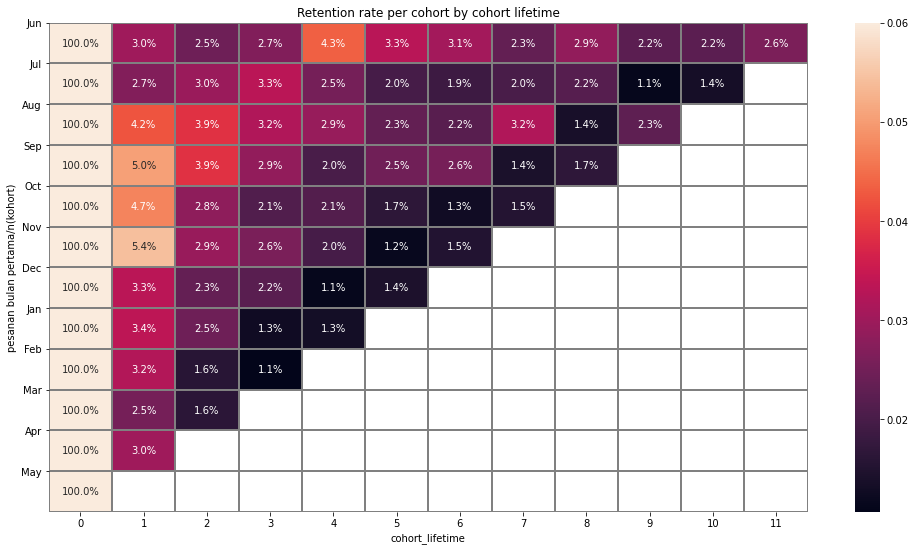

In [60]:
group_pivot = cohorts.pivot_table(index='first_order_month',
                                  columns='cohort_lifetime',
                                  values='retention_rate',
                                  aggfunc='sum')

ticks = ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

plt.figure(figsize=(17, 9))
plt.title('Retention rate per cohort by cohort lifetime')

ax = sns.heatmap(group_pivot,
                 annot=True,
                 fmt='.1%',
                 linewidths=1,
                 linecolor='gray',
                 vmax=0.06)

ax.set_xlabel('cohort_lifetime')
ax.set_ylabel('pesanan bulan pertama/n(kohort)')

plt.yticks(range(len(ticks)), ticks)
plt.show()

Dari heatmap, dapat terlihat bahwa retensi terbesar berada pada kisaran 5,4%, yakni pada pesanan bulan Desember dengan pesanan pertama mereka pada bulan November.

### Besar rata - rata pembelian per kohort per bulan

Setelah mengetahui bahwa terdapat kohort yang membeli kembali pada bulan berikutnya, selanjutnya perlu dilihat seberapa pengaruhnya terhadap penjualan.

In [61]:
orders_grouped_by_cohorts = (orders.groupby(['first_order_month', 'order_month'])
                             .agg({'revenue': 'sum', 'uid': 'nunique'})
                             .reset_index()
                            )
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,61
2,2017-06-01,2017-08-01,885.34,50
3,2017-06-01,2017-09-01,1931.30,54
4,2017-06-01,2017-10-01,2068.58,88


Selanjutnya dicari rata - rata pembelian yang dilakukan oleh masing - masing kohort per bulan

In [62]:
orders_grouped_by_cohorts['revenue_per_buyer'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,revenue_per_buyer
0,2017-06-01,2017-06-01,9557.49,2023,4.724414
1,2017-06-01,2017-07-01,981.82,61,16.095410
2,2017-06-01,2017-08-01,885.34,50,17.706800
3,2017-06-01,2017-09-01,1931.30,54,35.764815
4,2017-06-01,2017-10-01,2068.58,88,23.506591


Selanjutnya menambahkan siklus hidup kohort

In [63]:
orders_grouped_by_cohorts['cohort_lifetime'] = (((orders_grouped_by_cohorts['order_month'] - orders_grouped_by_cohorts['first_order_month']) 
                   )/ np.timedelta64(1, 'M')
                   ).round().astype('int')
orders_grouped_by_cohorts.head()

,first_order_month,order_month,revenue,uid,revenue_per_buyer,cohort_lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4


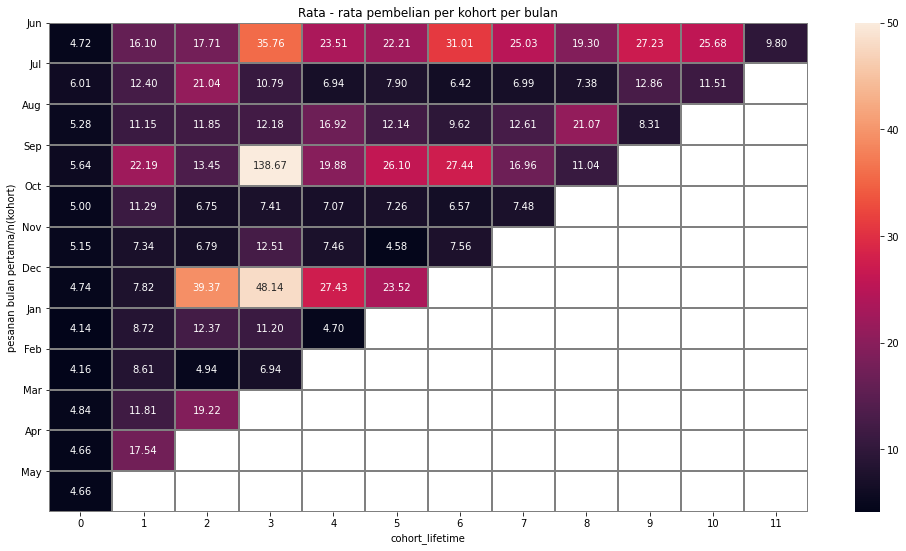

In [64]:
revenue_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                                      columns='cohort_lifetime',
                                                      values='revenue_per_buyer',
                                                      aggfunc='mean')

plt.figure(figsize=(17, 9))
plt.title('Rata - rata pembelian per kohort per bulan')

ax = sns.heatmap(revenue_pivot,
                 annot=True,
                 fmt='.2f',
                 linewidths=1,
                 linecolor='gray',
                 vmax=50)

ax.set_xlabel('cohort_lifetime')
ax.set_ylabel('pesanan bulan pertama/n(kohort)')

plt.yticks(range(len(ticks)), ticks)
plt.show()

Dari heatmap, dapat terlihat bahwa terdapat peningkatan dari rata - rata pembelian per kohort setelah kohort melakukan pembelian perdana. Dan kohort bulan September memberikan rata - rata pembelian terbesar pada bulan Desember.

### Nilai LTV (Lifetime Value)

Selanjutnya akan dilihat jumlah uang yang dikontribusikan oleh kohort per bulan. Nilai ini disebut dengan LTV. Pertama dicari terlebih dahulu total pendapatan per kohort per bulan

In [65]:
cohort_revenues = orders.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
cohort_revenues.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Dari dataset `initial_purchase_count` bisa disatukan dengan `cohort_revenues`

In [66]:
initial_purchase_count = initial_purchase_count.merge(cohort_revenues, on='first_order_month')
initial_purchase_count.head()

,first_order_month,cohort_purchase,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [67]:
initial_purchase_count['age'] = ((initial_purchase_count['order_month'] - initial_purchase_count ['first_order_month']
                                )/np.timedelta64(1, 'M')
                                ).round().astype('int')
initial_purchase_count['ltv'] = initial_purchase_count['revenue'] / initial_purchase_count['cohort_purchase']
initial_purchase_count.head()

,first_order_month,cohort_purchase,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [68]:
output = initial_purchase_count.pivot_table(index='first_order_month', 
                                            columns='age', 
                                            values='ltv', 
                                            aggfunc='mean').round(2)
ltv = output.cumsum(axis=1)
ltv.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5.0,5.93,7.0,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


Dapat terlihat bahwa untuk kohort bulan September memberikan pendapatan terbesar, diikuti oleh bulan Juni. Walaupun untuk kohort bulan September ketika berbelanja untuk bulan - bulan berikutnya terlihat kecil, namun 3 bulan setelah pembelian mereka menjadi besar.

### Jumlah uang yang dihabiskan untuk pemasaran

Selanjutnya perlu dicari uang yang telah dihabiskan untuk pemasaran. Terdapat 3 aspek yang ingin dicari, yakni keseluruhan, per sumber, dan per waktu.

In [69]:
print ('Total uang yang dikeluarkan untuk pemasaran adalah:', costs['costs'].sum())

Total uang yang dikeluarkan untuk pemasaran adalah: 329131.62


In [70]:
#pembuatan dataset ads_source untuk mengelompokan sumber iklan
ads_source = costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
#membuat dataset monthly_costs untuk mengelompokan per bulan
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_costs = costs.groupby(['month']).agg({'costs': 'sum'}).reset_index()

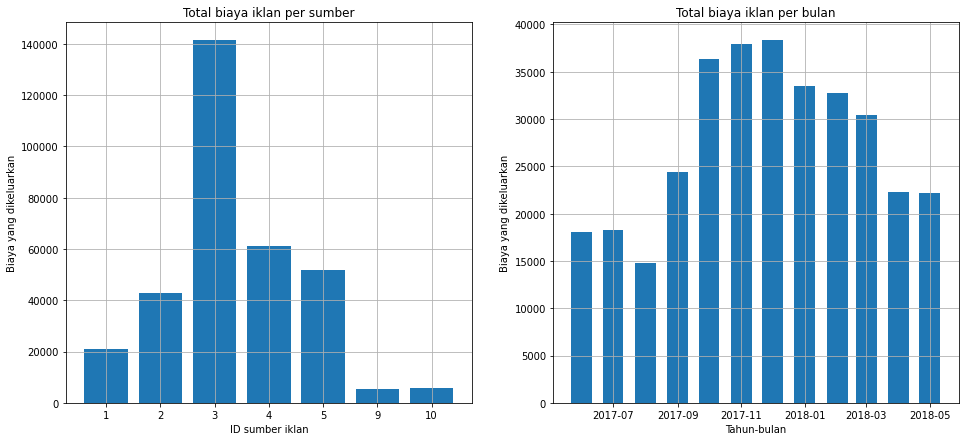

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
axes.reshape(-1)

axes[0].bar(ads_source.index, ads_source['costs'] , tick_label=[1, 2, 3, 4, 5, 9, 10])
axes[0].set_title('Total biaya iklan per sumber')
axes[0].set_xlabel('ID sumber iklan')
axes[0].set_ylabel('Biaya yang dikeluarkan')
axes[0].grid(True)

axes[1].bar(monthly_costs['month'], monthly_costs['costs'] , width=20)
axes[1].set_title('Total biaya iklan per bulan')
axes[1].set_xlabel('Tahun-bulan')
axes[1].set_ylabel('Biaya yang dikeluarkan')
axes[1].grid(True)

plt.show()

Dari grafik diatas, dapat terlihat bahwa pengeluaran untuk iklan terbesar pada ID sumber iklan 3, diikuti oleh 4 dan 5. Untuk pengeluaran iklan per bulan, dapat terlihat bahwa bulan Desember adalah bulan dengan pengeluaran iklan terbesar, diikuti oleh bulan November dan Oktober.

### Biaya akuisisi pelanggan dari masing - masing sumber

Untuk mengetahui seberapa besar pengaruh dari masing - masing sumber iklan, perlu dilihat biaya akuisisi pelanggan dari masing - masing sumber iklan. Biaya akuisisi ini disebut dengan CAC

In [72]:
first_sources = visits.sort_values(by='start_ts', ascending=True).groupby('uid', as_index=False).agg({'source_id': 'first'})
orders = orders.merge(first_sources, on='uid', how='left')
orders.head()

,uid,buy_ts,revenue,first_order,first_order_month,conversion,order_month,cohort_lifetime,source_id
0,10329302124590727494,2017-06-01 00:10:00,17.00,2017-06-01 00:10:00,2017-06-01,0,2017-06-01,0,1
1,11627257723692907447,2017-06-01 00:25:00,0.55,2017-06-01 00:25:00,2017-06-01,0,2017-06-01,0,2
2,17903680561304213844,2017-06-01 00:27:00,0.37,2017-06-01 00:27:00,2017-06-01,0,2017-06-01,0,2
3,16109239769442553005,2017-06-01 00:29:00,0.55,2017-06-01 00:29:00,2017-06-01,0,2017-06-01,0,2
4,14200605875248379450,2017-06-01 07:58:00,0.37,2017-06-01 07:58:00,2017-06-01,0,2017-06-01,0,3


Selanjutnya akan dikelompokan sumber iklan berdasarkan pengunjung unik dan digabungkan dengan dataset `ads_source` yang berisi total biaya per sumber iklan

In [73]:
source_orders = orders.groupby('source_id')['uid'].nunique().reset_index()
source_cac = source_orders.merge(ads_source, on='source_id')
source_cac['cac'] = source_cac['costs'] / source_cac['uid']
source_cac

,source_id,uid,costs,cac
0,1,2899,20833.27,7.186364
1,2,3506,42806.04,12.209367
2,3,10473,141321.63,13.493901
3,4,10295,61073.60,5.932356
4,5,6931,51757.10,7.467479
5,9,1088,5517.49,5.071222
6,10,1329,5822.49,4.381106


Dari data diatas bisa didapatkan grafik untuk mengambarkan biaya akuisisi pelanggan dari sumber iklan

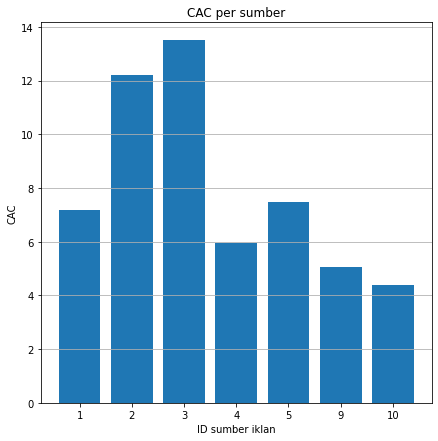

In [74]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.bar(x=source_cac.index, height=source_cac['cac'], tick_label=[1, 2, 3, 4, 5, 9, 10])
ax.set_title('CAC per sumber')
ax.set_xlabel('ID sumber iklan')
ax.set_ylabel('CAC')
ax.yaxis.grid(True)

Dari data dan grafik dapat terlihat bahwa sumber iklan 3 memberikan biaya CAC terbesar, yakni 13,49 per pelanggan, dan biaya CAC terendah berada pada sumber iklan 9, yakni 4,38 per pelanggan. Walaupun sumber iklan 3 memberikan jumlah pelanggan terbanyak dibandingkan sumber iklan yang lain, namun dikarenakan biaya iklan yang tinggi memberikan nilai CAC yang tinggi pula. Namun, perlu dilihat apakah biaya CAC yang tinggi juga memberikan ROMI yang tinggi juga.

### ROMI dari masing - masing sumber iklan

Selanjutnya akan dicari ROMI (Return on Marketing Investment) dari masing - masing sumber iklan. Pertama dicari terlebih dahulu jumlah pengunjung unik yang didapatkan dari masing - masing sumber iklan

In [85]:
source_sizes = orders.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
source_sizes.columns = ['source_id', 'n_buyers']
source_sizes.head()

,source_id,n_buyers
0,1,2899
1,2,3506
2,3,10473
3,4,10295
4,5,6931


Lalu dibuat dataset lain untuk menghitung jumlah pendapatan per kohort dan per sumber iklan

In [78]:
source_cohorts = orders.groupby(['source_id', 'order_month']).agg({'revenue': 'sum'}).reset_index()
source_cohorts.head()

,source_id,order_month,revenue
0,1,2017-06-01,1378.70
1,1,2017-07-01,1581.68
2,1,2017-08-01,1441.49
3,1,2017-09-01,3071.61
4,1,2017-10-01,3621.82


Kedua dataset diatas bisa digabungkan 

In [79]:
source_report = pd.merge(source_sizes, source_cohorts, on='source_id')
source_report.head()

,source_id,n_buyers,order_month,revenue
0,1,2899,2017-06-01,1378.70
1,1,2899,2017-07-01,1581.68
2,1,2899,2017-08-01,1441.49
3,1,2899,2017-09-01,3071.61
4,1,2899,2017-10-01,3621.82


Lalu dihitung nilai LTV dari pendapatan per jumlah pengguna unik

In [80]:
source_report['ltv'] = source_report['revenue'] / source_report['n_buyers']
source_report.head()

,source_id,n_buyers,order_month,revenue,ltv
0,1,2899,2017-06-01,1378.70,0.475578
1,1,2899,2017-07-01,1581.68,0.545595
2,1,2899,2017-08-01,1441.49,0.497237
3,1,2899,2017-09-01,3071.61,1.059541
4,1,2899,2017-10-01,3621.82,1.249334


Dari hasil kolom diatas, dicari total keseluruhan LTV dari masing - masing sumber iklan

In [82]:
output = source_report.pivot_table(index='source_id', columns='order_month', values='ltv', aggfunc='mean').round(2)
source_ltv = output.cumsum(axis=1)['2018-05-01'].reset_index().dropna()
source_ltv.columns = ['source_id', 'ltv']
source_ltv

,source_id,ltv
0,1,10.73
1,2,13.39
2,3,5.21
3,4,5.50
4,5,7.59
6,9,5.28
7,10,3.34


Dari hasil LTV ini akan digabungkan dengan data CAC yang telah didapatkan

In [83]:
source_romi = source_ltv.merge(source_cac[['cac', 'source_id']], on='source_id')
source_romi['romi'] = source_romi['ltv'] / source_romi['cac']
source_romi

,source_id,ltv,cac,romi
0,1,10.73,7.186364,1.493105
1,2,13.39,12.209367,1.096699
2,3,5.21,13.493901,0.386100
3,4,5.50,5.932356,0.927119
4,5,7.59,7.467479,1.016407
5,9,5.28,5.071222,1.041169
6,10,3.34,4.381106,0.762365


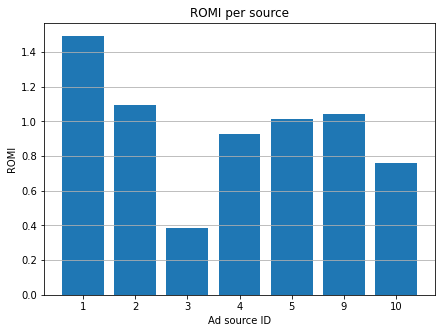

In [84]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x=source_romi.index, height=source_romi['romi'], tick_label=[1, 2, 3, 4, 5, 9, 10])
ax.set_title('ROMI per source')
ax.set_xlabel('Ad source ID')
ax.set_ylabel('ROMI')
ax.yaxis.grid(True)

Dari tabel dan grafik diatas, didapat kesimpulan bahwa walaupun sumber iklan 3 memberikan jumlah pelanggan terbesar, namun dikarenakan biaya iklan yang tinggi yang menyebabkan biaya CAC tinggi, sehingga ROMI yang diberikan terendah dibandingkan dengan sumber iklan yang lain. Disisi lain, sumber iklan 2 walaupun memiliki biaya CAC tertinggi kedua setelah sumber iklan 3, namun ia dapat memberikan ROMI tertinggi kedua setelah sumber iklan 1. Sumber iklan 1 berada pada urutan keempat dari biaya CAC tertinggi, namun ia memberikan ROMI tertinggi dibandingkan dengan sumber iklan yang lain. Sehingga untuk kedepannya, bagi divisi pemasaran bisa untuk fokus memberikan pendanaan lebih untuk sumber iklan 1 dan 2 serta mengurangi pengeluaran untuk sumber iklan 3, 4, dan 10. 

## Kesimpulan

Telah banyak dilakukan kegiatan analisa pada kasus ini. Dari kegiatan ini, didapatkan berbagai kesimpulan yang sedianya bisa berguna bagi Y.Ashifa:
Dari sisi kunjungan: 
- Dari bulan Agustus 2017 hingga Desember 2017 terjadi kenaikan jumlah pengunjung, dengan bulan Januari 2018 hingga bulan Juli 2018 terjadi penurunan jumlah pengunjung.
- Rata - rata, pengunjung menghabiskan 555 detik atau sekitar 9 menit dengan mayoritas pengunjung menghabiskan waktu kurang dari 2 menit
- Mayoritas pengunjung melakukan kunjungan kembali kurang dari 200 menit (sekitar 3,5 jam) atau 1200-1400 menit (sekitar 1 hari) setelah kunjungan terakhir dengan rata - rata pengunjung melakukan kunjungan kembali 11 jam.

Dari sisi pembelian:
- Sebagian besar pengunjung melakukan pembelian pertama dalam bulan yang sama dengan kunjungan pertamanya.
- Namun, tidak banyak pembeli yang melakukan pembelian pada bulan berikutnya setelah pembelian pertama. Tingkat retensi terbesar berada pada 5,4%, pada saat pembeli bulan November ingin membeli kembali pada bulan Desember
- Walau demikian, rata - rata pembelian membesar dibandingkan dengan rata - rata pembelian pada bulan pertamanya. Dengan rata - rata pembelian terbesar pada pembeli bulan September membeli kembali pada bulan Desember
- Pembeli bulan September memberikan nilai LTV terbesar, diikuti oleh pembeli bulan Juli

Dari sisi pemasaran:
- Sumber iklan 3 adalah sumber iklan dengan total biaya terbesar, diikuti oleh sumber iklan 4 dan 5. Bulan Desember adalah bulan dengan pengeluaran iklan terbesar, diikuti oleh bulan November dan bulan Oktober.
- Walau biaya pada sumber iklan 3 yang terbesar, namun sumber iklan ini termasuk sumber iklan termahal dalam mengakuisisi pelanggan, diikuti oleh sumber iklan 2 dan 5
- Sumber iklan 3, 4, dan 10 adalah sumber iklan yang tidak memberikan keuntungan sama sekali. Sedangkan sumber iklan 1 adalah sumber iklan dengan keuntungan terbesar, diikuti oleh sumber iklan 2.

Sehingga bagi Y.Ashifa terdapat beberapa rekomendasi kedepannya:
- Untuk meningkatkan tingkat retensi (pembeli yang kembali berbelanja pada bulan berikutnya) bisa memberikan suatu insentif bagi pembeli untuk pembelian kedua
- Dengan sumber iklan 1 memberikan keuntungan terbesar dengan biaya akuisisi pelanggan yang tidak terlalu tinggi, bisa dipertimbangkan untuk memberikan perhatian lebih untuk sumber iklan 1
- Sedangkan untuk sumber iklan 3, walaupun ia memberikan pelanggan terbesar, namun dikarenakan biaya akuisisi pelanggan tertinggi dan tidak memberikan keuntungan, bisa dipertimbangkan untuk mengurangi pengeluaran kepada sumber iklan 3
- Selain itu pula, sumber iklan 4 dan 10 juga tidak memberikan keuntungan sehingga bisa dipertimbangkan untuk mengurangi pengeluaran pada kedua sumber iklan tersebut.